<a href="https://colab.research.google.com/github/Wzx0110/Titanic---Machine-Learning-from-Disaster/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference


* [Teach Web](https://yulongtsai.medium.com/https-medium-com-yulongtsai-titanic-top3-8e64741cc11f)
* [Random Forest](https://medium.com/chung-yi/ml%E5%85%A5%E9%96%80-%E5%8D%81%E4%B8%83-%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-6afc24871857)
* [GSCV](http://www.taroballz.com/2018/07/14/ML_RandomForest/)
* [RFECV](https://ithelp.ithome.com.tw/articles/10232299)
* [Stratified K-Fold Cross-Validation](https://andy6804tw.github.io/2021/07/09/k-fold-validation/)

# Best Score
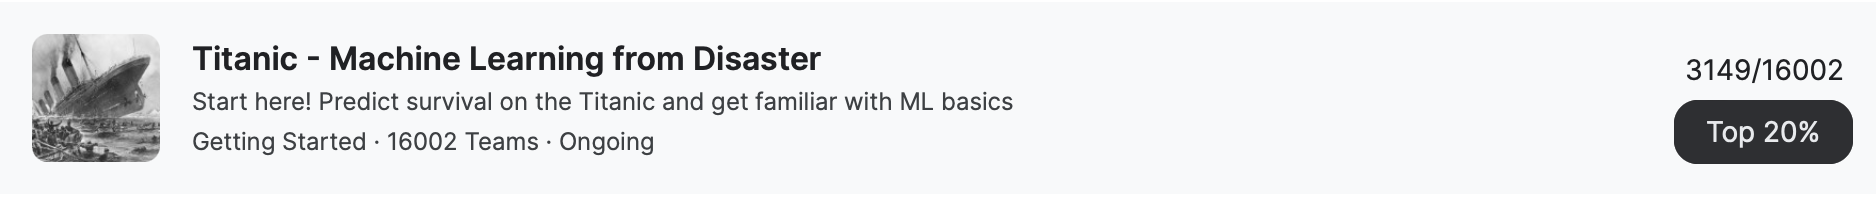

# Score Record
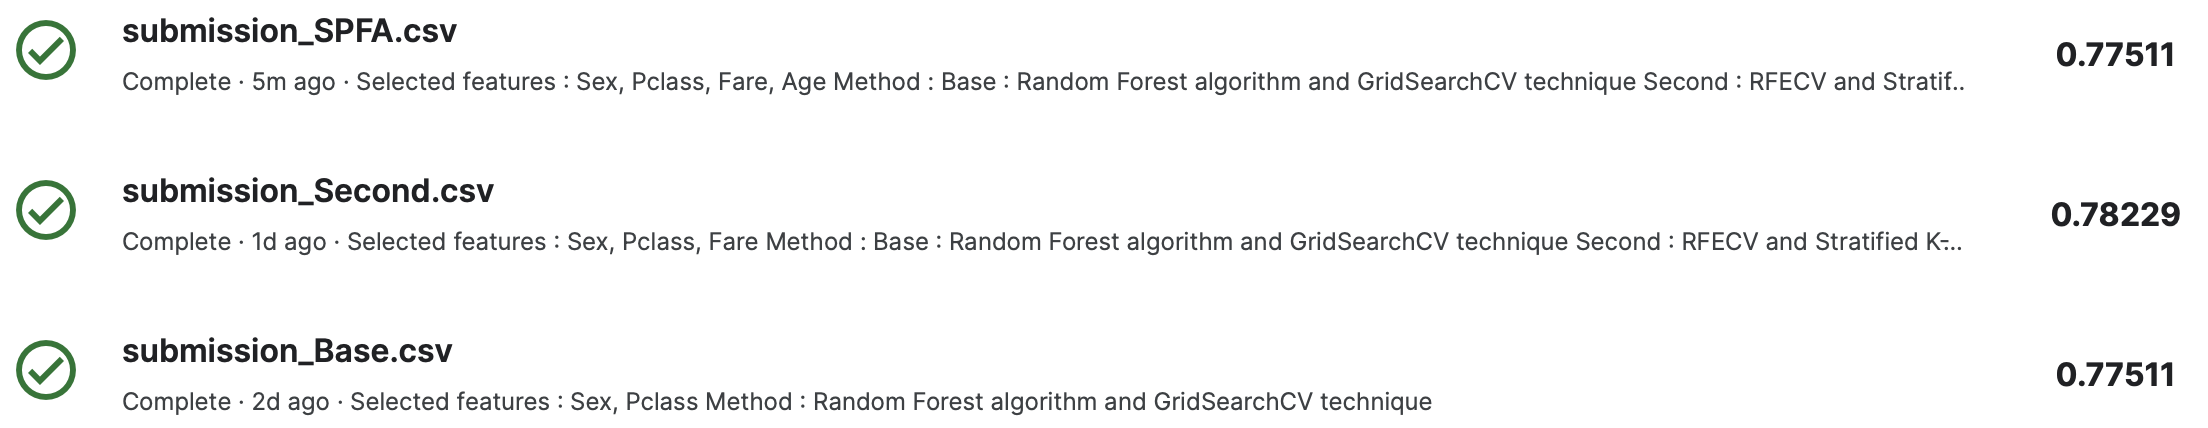


# Using Kaggle API to Load Titanic Dataset

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/c/titanic')

Skipping, found downloaded files in "./titanic" (use force=True to force download)


# Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier

# Titanic Dataset

In [ ]:
train_data = pd.read_csv('/content/titanic/train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test_data = pd.read_csv('/content/titanic/test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Features

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
total_data = pd.concat([train_data, test_data], ignore_index=True)
total_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Base Features

## Sex

,Survived
Sex,
female,0.742
male,0.189


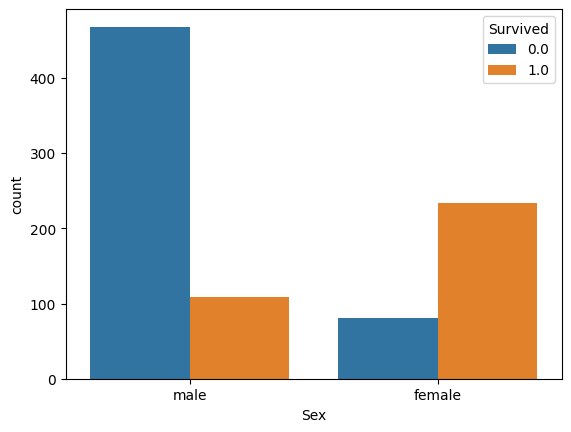

In [ ]:
sns.countplot(total_data, x='Sex', hue='Survived')
display(total_data[['Sex', 'Survived']].groupby(['Sex']).mean().round(3))

## Pclass

,Survived
Pclass,
1,0.630
2,0.473
3,0.242


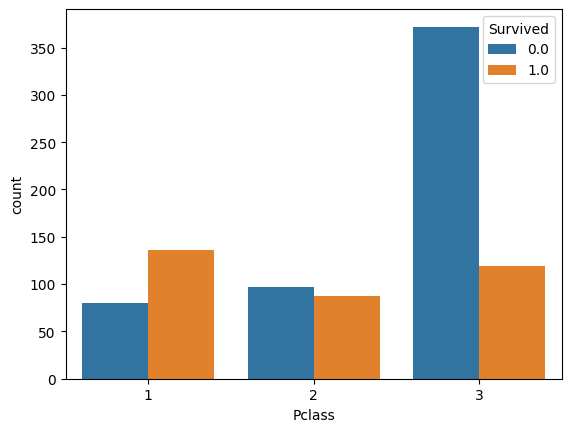

In [ ]:
sns.countplot(total_data, x='Pclass', hue='Survived')
display(total_data[['Pclass', 'Survived']].groupby(['Pclass']).mean().round(3))

# Data Prepocessing

In [ ]:
# Convert Sex to Sex_Code
total_data['Sex_Code'] = total_data['Sex'].map({'female' : 0, 'male' : 1}).astype('int')
total_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


In [ ]:
train_data = total_data[:len(train_data)]
test_data = total_data[len(train_data):]

In [ ]:
X = train_data.drop(labels=['PassengerId', 'Survived'], axis=1)
Y = train_data['Survived']

# Base Model

## Random Forest API

* n_estimators: int，森林裡樹木的數量，預設為10，為超參數
* criterion: string，分類依據(分割特徵的測量方法)，預設為根據gini係數分類
* max_depth: int或None，樹的最大深度，預設為None，為超參數
* bootstrap:是否隨機抽樣，默認為True
* max_features: 每個決策樹最大的特徵數量，預設為”auto”
  * “auto”: max_features = sqrt(n_features)
  * “sqrt”: max_features = sqrt(n_features) 與”auto”一樣
  * “log2”: max_features = log2(n_features)
  * None : max_features = n_features
* min_samples_split :
* min_samples_leaf :
* bootstrap : boolean，預設為True，是否在構建樹時使用放回抽樣
* oob_score : 是否使用Out-Of-Bag data
* random_state : 隨機種子，確保結果的可重現性

In [ ]:
Base = ['Sex_Code', 'Pclass']
Base_Model = RandomForestClassifier(random_state=2,
                                    n_estimators=250,
                                    min_samples_split=20,
                                    oob_score=True)
Base_Model.fit(X[Base], Y)
print(f'Base oob score : {Base_Model.oob_score_:.5f}')

Base oob score : 0.73176


## GridSearchCV(網格搜尋交叉驗證、超參數優化)

In [ ]:
from sklearn.model_selection import GridSearchCV
RF = RandomForestClassifier()
RF_param = {'n_estimators' : [100, 150, 200],
            'max_depth' : [5, 10, 15, 20],
            'min_samples_split' : [5, 10, 20, 50]}
GSCV = GridSearchCV(RF, param_grid=RF_param, cv=5)
GSCV.fit(X[Base], Y)
print('accuracy score : ', GSCV.score(X[Base], Y))
print('The best model param : ', GSCV.best_params_)

accuracy score :  0.7867564534231201
The best model param :  {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}


# Base Model Submit

In [ ]:
Base = ['Sex_Code', 'Pclass']
Base_Model = RandomForestClassifier(random_state=1,
                                    n_estimators=60,
                                    min_samples_split=5,
                                    oob_score=True)
Base_Model.fit(X[Base], Y)
print(f'Base oob score : {Base_Model.oob_score_:.5f}')

Base oob score : 0.76655


In [ ]:
Base_pred = Base_Model.predict(test_data[Base])
submission = pd.DataFrame({'PassengerId' : test_data['PassengerId'],
                           'Survived' : Base_pred.astype(int)})
submission.to_csv('submission_Base.csv', index=False)

# Another Features

## Fare

In [ ]:
fig, ax = plt.subplots(figsize=(6, 8))
total_data['Log_Fare'] = np.log10(total_data['Fare'] + 1)
sns.boxplot(total_data, x='Pclass', y='Log_Fare', hue='Survived', orient='v', ax=ax)
ax.set_title('Log_Fare & Pclass vs Survived', fontsize=16)
pd.pivot_table(total_data, values=['Fare'], index=['Pclass'], columns=['Survived'], aggfunc='median').round(3)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Filling missing values
total_data['Fare'] = total_data['Fare'].fillna(total_data['Fare'].median())

# Making Bins
total_data['FareBin_4'] = pd.qcut(total_data['Fare'], q=4)
total_data['FareBin_5'] = pd.qcut(total_data['Fare'], q=5)
total_data['FareBin_6'] = pd.qcut(total_data['Fare'], q=6)

label = LabelEncoder()

total_data['FareBin_Code_4'] = label.fit_transform(total_data['FareBin_4'])
total_data['FareBin_Code_5'] = label.fit_transform(total_data['FareBin_5'])
total_data['FareBin_Code_6'] = label.fit_transform(total_data['FareBin_6'])

# Cross-tabulation
print("Cross-tabulation for FareBin_Code_4:")
display(pd.crosstab(total_data['FareBin_Code_4'], total_data['Pclass']))
print("\nCross-tabulation for FareBin_Code_5:")
display(pd.crosstab(total_data['FareBin_Code_5'], total_data['Pclass']))
print("\nCross-tabulation for FareBin_Code_6:")
display(pd.crosstab(total_data['FareBin_Code_6'], total_data['Pclass']))

# Plots
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, sharey=True)
fig.set_figwidth(18)
for axi in [ax1, ax2, ax3]:
    axi.axhline(0.5, linestyle='dashed', c='black', alpha=0.3)
sns.barplot(total_data, x='FareBin_Code_4', y='Survived', ax=ax1)
sns.barplot(total_data, x='FareBin_Code_5', y='Survived', ax=ax2)
sns.barplot(total_data, x='FareBin_Code_6', y='Survived', ax=ax3)

In [ ]:
train_data = total_data[:len(train_data)]
test_data = total_data[len(train_data):]
X = train_data.drop(labels=['Survived','PassengerId'],axis=1)
Y = train_data['Survived']
X.columns

### RFECV(結合交叉驗證之遞迴特徵刪除)

In [ ]:
from sklearn.feature_selection import RFECV
compare = ['Sex_Code', 'Pclass', 'FareBin_Code_4', 'FareBin_Code_5', 'FareBin_Code_6']
selector = RFECV(RandomForestClassifier(n_estimators=250,min_samples_split=20),cv=10,n_jobs=-1)
selector.fit(X[compare], Y)
print(f"Selected features:\n{selector.support_}")
print(f"Feature rankings:\n{selector.ranking_}")
print(f"Cross-validated scores：\n{selector.cv_results_['mean_test_score']*100}")

### Stratified K-Fold Cross-Validation(分層交叉驗證)

In [ ]:
from sklearn.model_selection import StratifiedKFold
score_b4, score_b5, score_b6 = [], [], []
seeds = 10
for i in range(seeds):
    diff_cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=i)
    selector = RFECV(RandomForestClassifier(random_state=i,n_estimators=250,min_samples_split=20),cv=diff_cv,n_jobs=-1)
    selector.fit(X[compare], Y)
    score_b4.append(selector.cv_results_['mean_test_score'][2])
    score_b5.append(selector.cv_results_['mean_test_score'][3])
    score_b6.append(selector.cv_results_['mean_test_score'][4])

KeyboardInterrupt: 

In [ ]:
fig = plt.figure(figsize=(18,8))
ax = plt.gca()
ax.plot(range(seeds), score_b4, '-ok', label='bins = 4')
ax.plot(range(seeds), score_b5, '-og', label='bins = 5')
ax.plot(range(seeds), score_b6, '-ob', label='bins = 6')
ax.set_xlabel("Seed #", fontsize = '14')
ax.set_ylim(0.785,0.81)
ax.set_ylabel("Accuracy", fontsize = '14')
ax.set_title('bins = 4 vs bins = 5 vs bins = 6', fontsize='20')
plt.legend(fontsize = 14, loc='upper right')

In [ ]:
b4, b5, b6 = ['Sex_Code', 'Pclass', 'FareBin_Code_4'], ['Sex_Code', 'Pclass', 'FareBin_Code_5'], ['Sex_Code', 'Pclass', 'FareBin_Code_6']

b4_Model = RandomForestClassifier(random_state=2,
                                  n_estimators=250,
                                  min_samples_split=20,
                                  oob_score=True)
b4_Model.fit(X[b4], Y)

b5_Model = RandomForestClassifier(random_state=2,
                                  n_estimators=250,
                                  min_samples_split=20,
                                  oob_score=True)
b5_Model.fit(X[b5], Y)

b6_Model = RandomForestClassifier(random_state=2,
                                  n_estimators=250,
                                  min_samples_split=20,
                                  oob_score=True)
b6_Model.fit(X[b6], Y)

print(f'b4 oob score : {b4_Model.oob_score_:.5f}')
print(f'b5 oob score : {b5_Model.oob_score_:.5f}')
print(f'b6 oob score : {b6_Model.oob_score_:.5f}')

In [ ]:
b5_pred = b5_Model.predict(test_data[b5])
submission = pd.DataFrame({"PassengerId": test_data['PassengerId'],
                           "Survived"   : b5_pred.astype(int)})
submission.to_csv("submission_Second.csv",index=False)

## Age

In [ ]:
total_data['Has_Age'] = total_data['Age'].isnull().map(lambda x: 0 if x == True else 1)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(total_data, x='Pclass', hue='Has_Age', ax=axes[0])
axes[0].set_title('Count of Pclass based on Has_Age')
sns.countplot(total_data, x='Sex', hue='Has_Age', ax=axes[1])
axes[1].set_title('Count of Sex based on Has_Age')

display(pd.crosstab(index=total_data['Has_Age'], columns=total_data['Pclass'], margins=True))
display(pd.crosstab(index=total_data['Has_Age'], columns=total_data['Sex'], margins=True))

In [ ]:
# Masks
Mask_Has_Age_P12_Survived = ((total_data['Has_Age'] == 1) & (total_data['Pclass'] != 3) & (total_data['Survived'] == 1))
Mask_Has_Age_P12_Dead = ((total_data['Has_Age'] == 1) & (total_data['Pclass'] != 3) & (total_data['Survived'] == 0))

# Plot
fig, ax = plt.subplots(figsize=(18, 6))
sns.histplot(total_data.loc[Mask_Has_Age_P12_Survived, 'Age'], kde=True, bins=80, stat='density', label='Survived', ax=ax)
sns.histplot(total_data.loc[Mask_Has_Age_P12_Dead, 'Age'], kde=True, bins=80, stat='density', label='Dead', ax=ax)

ax.axvline(x=16, color='red', linestyle='--', label='Age=16')

ax.legend()
ax.set_title('Age vs Survived in Pclass = 1 and 2', fontsize=16)
plt.show()

In [ ]:
# extracted title using name
total_data['Title'] = total_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
total_data['Title'] = total_data['Title'].replace(['Capt', 'Col', 'Countess', 'Don',
                                                   'Dr', 'Dona', 'Jonkheer',
                                                   'Major','Rev','Sir'],'Rare')
total_data['Title'] = total_data['Title'].replace(['Mlle', 'Ms','Mme'],'Miss')
total_data['Title'] = total_data['Title'].replace(['Lady'],'Mrs')
total_data['Title_Code'] = total_data['Title'].map({"Mr" : 0, "Rare" : 1, "Master" : 2, "Miss" : 3, "Mrs" : 4}).astype(int)
display(total_data.groupby('Title')['Age'].median())

In [ ]:
Title_pred = total_data.groupby('Title_Code')['Age'].median()
total_data['Title_Age'] = total_data['Age']

# Filling the missing age
for i in range(5):
    total_data.loc[(total_data['Age'].isnull()) & (total_data['Title_Code'] == i),'Title_Age'] = Title_pred[i].astype(int)
total_data['Title_Age_Minor'] = ((total_data['Title_Age']) < 16.0) * 1

In [ ]:
train_data = total_data[:len(train_data)]
test_data = total_data[len(train_data):]
X = train_data.drop(labels=['Survived','PassengerId'],axis=1)
Y = train_data['Survived']

In [ ]:
from sklearn.model_selection import GridSearchCV
SPFA = ['Sex_Code','Pclass','FareBin_Code_5','Title_Age_Minor']
RF = RandomForestClassifier()
RF_param = {'n_estimators' : [100, 150, 200],
            'max_depth' : [5, 10, 15, 20],
            'min_samples_split' : [5, 10, 20, 50]}
GSCV = GridSearchCV(RF, param_grid=RF_param, cv=5)
GSCV.fit(X[SPFA], Y)
print('accuracy score : ', GSCV.score(X[SPFA], Y))
print('The best model param : ', GSCV.best_params_)

In [ ]:
SPFA = ['Sex_Code','Pclass','FareBin_Code_5','Title_Minor']
SPFA_Model = RandomForestClassifier(random_state=2, n_estimators=150, min_samples_split=10, max_depth=5, oob_score=True)
SPFA_Model.fit(X[SPFA], Y)
print(f'SPFA oob score : {SPFA_Model.oob_score_:.5f}')

In [ ]:
# submits
SPFA_pred = SPFA_Model.predict(test_data[SPFA])
submission = pd.DataFrame({'PassengerId' : test_data['PassengerId'],
                           'Survived' : SPFA_pred.astype(int)})
submission.to_csv('submission_SPFA.csv', index=False)